In [67]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
from collections import Counter

# Support Functions

In [68]:
def rgba_to_luminance(rgba):
    r, g, b, _ = rgba
    luminance = 0.2126 * r + 0.7152 * g + 0.0722 * b
    return luminance

def extract_logo_colors(button_logo_image, orig_color_1, orig_color_2):
    # Convert the logo image to RGBA format
    button_logo_image = button_logo_image.convert("RGBA")

    # Get the pixel data of the logo image
    pixels = button_logo_image.getdata()

    # Filter out transparent pixels
    pixels = [pixel for pixel in pixels if pixel[3] > 0]

    # Count the occurrence of each color
    color_counts = Counter(pixels)

    # Sort the colors by count in descending order
    sorted_colors = sorted(color_counts, key=color_counts.get, reverse=True)

    # Check if at least two distinct colors are found
    if len(sorted_colors) >= 2:
        # Get the two most frequently used colors
        color1 = sorted_colors[0][:4]
        color2 = sorted_colors[1][:4]
        # (c1_r, c1_g, c1_b, c1_a) = color1
        # (c2_r, c2_g, c2_b, c2_a) = color2

        color1_lum = rgba_to_luminance(color1)
        color2_lum = rgba_to_luminance(color2)

        contrast_ratio = (max(color1_lum, color2_lum) + 0.0001) / (min(color1_lum, color2_lum) + 0.0001)

        # print('color1')
        # print(color1)
        # print(sum(color1[:3]))
        # print('color2')
        # print(color2)
        # print(sum(color2[:3]))
        # print('contrast_ratio')
        # print(contrast_ratio)

        # Convert RGB values to the range of 0 to 1
        # color1 = (c1_r / 255, c1_g / 255, c1_b / 255, c1_a / 255)
        # color2 = (c2_r / 255, c2_g / 255, c2_b / 255, c2_a / 255)

        # Check if the colors are distinctly different
        if contrast_ratio >= 1.75:
            if color1_lum < color2_lum:
                return color1, color2
            else:
                return color2, color1

    # Check if at least three distinct colors are found
    if len(sorted_colors) >= 3:
        # Get the first and third most frequently used colors
        color1 = sorted_colors[0][:4]
        color3 = sorted_colors[2][:4]
        # (c1_r, c1_g, c1_b, c1_a) = color1
        # (c3_r, c3_g, c3_b, c3_a) = color3

        color1_lum = rgba_to_luminance(color1)
        color3_lum = rgba_to_luminance(color3)
        
        contrast_ratio = (max(color1_lum, color3_lum) + 0.0001) / (min(color1_lum, color3_lum) + 0.0001)

        # print('color1')
        # print(color1)
        # print(sum(color1[:3]))
        # print('color3')
        # print(color3)
        # print(sum(color3[:3]))
        # print('contrast_ratio')
        # print(contrast_ratio)

        # Convert RGB values to the range of 0 to 1
        # color1 = (c1_r / 255, c1_g / 255, c1_b / 255, c1_a / 255)
        # color3 = (c3_r / 255, c3_g / 255, c3_b / 255, c3_a / 255)

        if contrast_ratio >= 1.75:
            if color1_lum < color3_lum:
                return color1, color3
            else:
                return color3, color1

    # Default to colors provided in the input if two sufficiently distinct colors are not found        
    return orig_color_1, orig_color_2

# Logo Definitions

In [69]:
button_logo_location = 'Logos/Button/'
button_logo_name = 'TAP_Portugal'
button_logo_extension = '.png'
button_logo_is_circle = False            # Set to True if logo is a circle. Requires that the logo image is square (1:1 aspect ratio)

# Import Logo Images

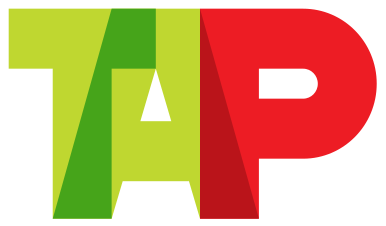

RGBA
(386, 226)


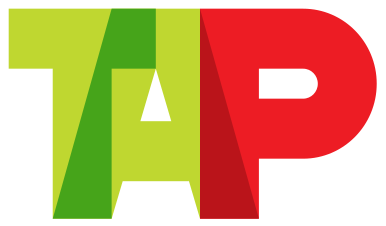

RGBA
(386, 226)


In [70]:
try:
    button_logo_image = Image.open(button_logo_location + button_logo_name + button_logo_extension)
    display(button_logo_image)
    print(button_logo_image.mode)
    print(button_logo_image.size)
    button_logo_image = button_logo_image.convert('RGBA')
    display(button_logo_image)
    print(button_logo_image.mode)
    print(button_logo_image.size)
except:
    pass

# Markings Definitions

### Hockey

In [71]:
hockey_standard_length = 60000
hockey_standard_width = 30000

corner_radius = 8000

hockey_goal_line_offset = 4000
hockey_goal_line_width = 50
hockey_goal_crease_radius = 1800
hockey_goal_width = 1830
hockey_goal_chevron_offset_x = 1220
hockey_goal_chevron_length = 150

hockey_blue_red_line_width = 300
hockey_blue_line_offset = hockey_goal_line_offset + ((hockey_standard_length - (hockey_goal_line_offset * 2)) / 3)
hockey_red_line_gap = 500

hockey_referee_crease_radius = 3000

hockey_center_ice_spot_radius = 150
hockey_center_ice_circle_radius = 4500
hockey_center_ice_circle_width = 50

hockey_faceoff_spot_width = 50
hockey_faceoff_spot_chord_height = 75
hockey_faceoff_spot_interior_radius = 175
hockey_faceoff_spot_radius = hockey_faceoff_spot_width + hockey_faceoff_spot_chord_height + hockey_faceoff_spot_interior_radius

hockey_faceoff_circle_radius = 4500
hockey_faceoff_line_length_x = 1200
hockey_faceoff_line_length_y = 900
hockey_faceoff_line_gap_offset_x = 225
hockey_faceoff_line_gap_offset_y = 600
hockey_faceoff_line_outside_gap_offset_y = 850

hockey_faceoff_offset_goal = 10000
hockey_faceoff_offset_blue_line = 1500

hockey_blue_line_color = 'blue'
hockey_red_line_color = 'red'
hockey_goal_line_color = 'red'
hockey_goal_crease_line_color = 'red'
hockey_goal_crease_fill_color = 'lightblue'
hockey_center_ice_color = 'blue'
hockey_faceoff_color = 'red'
hockey_referee_crease_color = 'red'


### Curling

In [72]:
# Sizes
standard_length = 45720
standard_width = 4750

twelve_ft_radius = 1829
eight_ft_radius = 1219
four_ft_radius = 610
button_radius = four_ft_radius / 2      # Official minimum radius: 152mm
pin_radius = 13
hog_line_width = 102
other_line_width = 13
hack_line_length = 457
hack_size_width = 152
hack_size_length = 203
hack_offset = 76
courtesy_line_length = 152
md_spot_size = 20
rock_circumference = 914
rock_diameter = rock_circumference / np.pi
rock_box_length = rock_diameter * 8
rock_box_width = rock_diameter

# Positions
tee_line = 17375
back_line = tee_line + 1829
hog_line = tee_line - 6401
hack_line = back_line + 1829
back_board = hack_line + 1829
courtesy_line = hog_line - 1219
wheelchair_line_y_offset = 457
wheelchair_line = tee_line - np.sqrt(twelve_ft_radius ** 2 - wheelchair_line_y_offset ** 2)

# Define Marking Colors
twelve_ft_color = 'red'
eight_ft_color = 'white'
four_ft_color = 'green'
button_color = 'white'
pin_color = 'black'
hog_line_color = twelve_ft_color
line_color = 'black'
md_spot = 'grey'
rock_box_red = 'red'
rock_box_yellow = 'gold'

# Base Outline

In [73]:
sheets = 4
sheet_gap_size = 1000
sheet_gap_interval = 2  # Set to 0 to not have any
board_size = 1000

img_length = max(standard_length, hockey_standard_length) + (2 * board_size)
img_width = max((standard_width * sheets) + ((sheets // sheet_gap_interval - 1) * sheet_gap_size), hockey_standard_width) + (2 * board_size)
print(img_length)
print(img_width)

middle_x = img_length / 2
middle_y = img_width / 2
print(middle_x)
print(middle_y)

# Create a blank image
image = Image.new('RGBA', (img_length, img_width), 'white')

# Create a draw object
draw = ImageDraw.Draw(image)

# Define rectangle dimensions and corner radius
x1, y1 = board_size, board_size
x2, y2 = img_length - board_size, img_width - board_size
print(x1, y1)
print(x2, y2)
# Draw the arcs for the rounded corners
draw.arc([(x1, y1), (x1 + corner_radius*2, y1 + corner_radius*2)], start=180, end=270, fill='black', width=5)
draw.arc([(x2 - corner_radius*2, y1), (x2, y1 + corner_radius*2)], start=270, end=360, fill='black', width=5)
draw.arc([(x1, y2 - corner_radius*2), (x1 + corner_radius*2, y2)], start=90, end=180, fill='black', width=5)
draw.arc([(x2 - corner_radius*2, y2 - corner_radius*2), (x2, y2)], start=0, end=90, fill='black', width=5)
# Draw lines to create the sides
draw.line([(x1 + corner_radius, y1), (x2 - corner_radius, y1)], fill='black', width=5)  # Top line
draw.line([(x1 + corner_radius, y2), (x2 - corner_radius, y2)], fill='black', width=5)  # Bottom line
draw.line([(x1, y1 + corner_radius), (x1, y2 - corner_radius)], fill='black', width=5)  # Left line
draw.line([(x2, y1 + corner_radius), (x2, y2 - corner_radius)], fill='black', width=5)  # Right line

62000
32000
31000.0
16000.0
1000 1000
61000 31000


# Hockey

### Lines across the rink

In [74]:
goal_line_adjust = corner_radius - np.sqrt(corner_radius ** 2 - hockey_goal_line_offset  ** 2)

# Draw Goal Lines
draw.line(
    [(board_size + hockey_goal_line_offset, board_size + goal_line_adjust)
     , (board_size + hockey_goal_line_offset, img_width - board_size - goal_line_adjust)]
     , fill=hockey_goal_line_color
     , width=hockey_goal_line_width
     )
draw.line(
    [(img_length - board_size - hockey_goal_line_offset, board_size + goal_line_adjust)
     , (img_length - board_size - hockey_goal_line_offset, img_width - board_size - goal_line_adjust)]
     , fill=hockey_goal_line_color
     , width=hockey_goal_line_width
     )

# Draw Red & Blue Lines

draw.line(
    [(middle_x, board_size)
     , (middle_x, middle_y - (hockey_red_line_gap / 2))]
     , fill=hockey_red_line_color
     , width=hockey_blue_red_line_width
     )
draw.line(
    [(middle_x, middle_y + (hockey_red_line_gap / 2))
     , (middle_x, img_width - board_size)]
     , fill=hockey_red_line_color
     , width=hockey_blue_red_line_width
     )
draw.line(
    [(board_size + hockey_blue_line_offset, board_size)
     , (board_size + hockey_blue_line_offset, img_width - board_size)]
     , fill=hockey_blue_line_color
     , width=hockey_blue_red_line_width
     )
draw.line(
    [(img_length - board_size - hockey_blue_line_offset, board_size)
     , (img_length - board_size - hockey_blue_line_offset, img_width - board_size)]
     , fill=hockey_blue_line_color
     , width=hockey_blue_red_line_width
     )

### Goal Markings

In [75]:
# Draw Semi-Circles
draw.chord(
    [(board_size + hockey_goal_line_offset - hockey_goal_crease_radius - (hockey_goal_line_width / 2), middle_y - hockey_goal_crease_radius)
     , (board_size + hockey_goal_line_offset + hockey_goal_crease_radius - (hockey_goal_line_width / 2), middle_y + hockey_goal_crease_radius)]
     , start=270
     , end=90
     , fill=hockey_goal_crease_fill_color
     , outline=hockey_goal_crease_line_color
     , width=hockey_goal_line_width)
draw.chord(
    [(img_length - board_size - hockey_goal_line_offset - hockey_goal_crease_radius + (hockey_goal_line_width / 2), middle_y - hockey_goal_crease_radius)
     , (img_length - board_size - hockey_goal_line_offset + hockey_goal_crease_radius + (hockey_goal_line_width / 2), middle_y + hockey_goal_crease_radius)]
     , start=90
     , end=270
     , fill=hockey_goal_crease_fill_color
     , outline=hockey_goal_crease_line_color
     , width=hockey_goal_line_width)

# Draw Goal Post Markers
draw.line(
    [(board_size + hockey_goal_line_offset - (hockey_goal_line_width / 2) - hockey_goal_chevron_length, middle_y - (hockey_goal_width / 2))
     , (board_size + hockey_goal_line_offset - (hockey_goal_line_width / 2), middle_y - (hockey_goal_width / 2))]
     , fill=hockey_goal_line_color
     , width=hockey_goal_line_width)
draw.line(
    [(board_size + hockey_goal_line_offset - (hockey_goal_line_width / 2) - hockey_goal_chevron_length, middle_y + (hockey_goal_width / 2))
     , (board_size + hockey_goal_line_offset - (hockey_goal_line_width / 2), middle_y + (hockey_goal_width / 2))]
     , fill=hockey_goal_line_color
     , width=hockey_goal_line_width)
draw.line(
    [(img_length - board_size - hockey_goal_line_offset + (hockey_goal_line_width / 2), middle_y - (hockey_goal_width / 2))
     , (img_length - board_size - hockey_goal_line_offset + (hockey_goal_line_width / 2) + hockey_goal_chevron_length, middle_y - (hockey_goal_width / 2))]
     , fill=hockey_goal_line_color
     , width=hockey_goal_line_width)
draw.line(
    [(img_length - board_size - hockey_goal_line_offset + (hockey_goal_line_width / 2), middle_y + (hockey_goal_width / 2))
     , (img_length - board_size - hockey_goal_line_offset + (hockey_goal_line_width / 2) + hockey_goal_chevron_length, middle_y + (hockey_goal_width / 2))]
     , fill=hockey_goal_line_color
     , width=hockey_goal_line_width)

# Draw Crease Chevrons
y_offset = np.sqrt(hockey_goal_crease_radius ** 2 - hockey_goal_chevron_offset_x ** 2) - (hockey_goal_line_width / 2)

# Left Chevrons
draw.line(
    [(board_size + hockey_goal_line_offset + hockey_goal_chevron_offset_x - hockey_goal_chevron_length, middle_y - y_offset + (hockey_goal_line_width / 2))
     , (board_size + hockey_goal_line_offset + hockey_goal_chevron_offset_x, middle_y - y_offset + (hockey_goal_line_width / 2))]
     , fill=hockey_goal_line_color
     , width=hockey_goal_line_width)
draw.line(
    [(board_size + hockey_goal_line_offset + hockey_goal_chevron_offset_x - (hockey_goal_line_width / 2), middle_y - y_offset)
     , (board_size + hockey_goal_line_offset + hockey_goal_chevron_offset_x - (hockey_goal_line_width / 2), middle_y - y_offset + hockey_goal_chevron_length)]
     , fill=hockey_goal_line_color
     , width=hockey_goal_line_width)
draw.line(
    [(board_size + hockey_goal_line_offset + hockey_goal_chevron_offset_x - (hockey_goal_line_width / 2), middle_y + y_offset - hockey_goal_chevron_length)
     , (board_size + hockey_goal_line_offset + hockey_goal_chevron_offset_x - (hockey_goal_line_width / 2), middle_y + y_offset)]
     , fill=hockey_goal_line_color
     , width=hockey_goal_line_width)
draw.line(
    [(board_size + hockey_goal_line_offset + hockey_goal_chevron_offset_x - hockey_goal_chevron_length, middle_y + y_offset - (hockey_goal_line_width / 2))
     , (board_size + hockey_goal_line_offset + hockey_goal_chevron_offset_x, middle_y + y_offset - (hockey_goal_line_width / 2))]
     , fill=hockey_goal_line_color
     , width=hockey_goal_line_width)

# Right Chevrons
draw.line(
    [(img_length - (board_size + hockey_goal_line_offset + hockey_goal_chevron_offset_x - hockey_goal_chevron_length), middle_y - y_offset + (hockey_goal_line_width / 2))
     , (img_length - (board_size + hockey_goal_line_offset + hockey_goal_chevron_offset_x), middle_y - y_offset + (hockey_goal_line_width / 2))]
     , fill=hockey_goal_line_color
     , width=hockey_goal_line_width)
draw.line(
    [(img_length - (board_size + hockey_goal_line_offset + hockey_goal_chevron_offset_x - (hockey_goal_line_width / 2)), middle_y - y_offset)
     , (img_length - (board_size + hockey_goal_line_offset + hockey_goal_chevron_offset_x - (hockey_goal_line_width / 2)), middle_y - y_offset + hockey_goal_chevron_length)]
     , fill=hockey_goal_line_color
     , width=hockey_goal_line_width)
draw.line(
    [(img_length - (board_size + hockey_goal_line_offset + hockey_goal_chevron_offset_x - (hockey_goal_line_width / 2)), middle_y + y_offset - hockey_goal_chevron_length)
     , (img_length - (board_size + hockey_goal_line_offset + hockey_goal_chevron_offset_x - (hockey_goal_line_width / 2)), middle_y + y_offset)]
     , fill=hockey_goal_line_color
     , width=hockey_goal_line_width)
draw.line(
    [(img_length - (board_size + hockey_goal_line_offset + hockey_goal_chevron_offset_x - hockey_goal_chevron_length), middle_y + y_offset - (hockey_goal_line_width / 2))
     , (img_length - (board_size + hockey_goal_line_offset + hockey_goal_chevron_offset_x), middle_y + y_offset - (hockey_goal_line_width / 2))]
     , fill=hockey_goal_line_color
     , width=hockey_goal_line_width)

### Center Markings

In [76]:
# Spot
draw.ellipse(
    [(middle_x - hockey_center_ice_spot_radius, middle_y - hockey_center_ice_spot_radius)
     , (middle_x + hockey_center_ice_spot_radius, middle_y + hockey_center_ice_spot_radius)]
     , fill=hockey_center_ice_color
     , width=hockey_center_ice_circle_width)

# Circle
draw.ellipse(
    [(middle_x - hockey_center_ice_circle_radius, middle_y - hockey_center_ice_circle_radius)
     , (middle_x + hockey_center_ice_circle_radius, middle_y + hockey_center_ice_circle_radius)]
     , outline=hockey_center_ice_color
     , width=hockey_center_ice_circle_width)

### Faceoff Spots

### Faceoff Lines

In [77]:
# Save the image to a file
image.save('Arena/Test.png')
del image

# Curling

### Extract Button Logo Colors

In [161]:
try:
    twelve_ft_color, four_ft_color = extract_logo_colors(button_logo_image, twelve_ft_color, four_ft_color)
    hog_line_color = twelve_ft_color
except:
    pass

### Calculate Sheet & Board Configuration

In [162]:
# Calculate number of middle boards to draw
middle_walks_needed = 0 if sheet_gap_interval == 0 else sheets // sheet_gap_interval - 1

# Build object order list
lst_objects = []
n_sheets = 0
cont=True

while cont:
    lst_objects.append(1)
    n_sheets += 1
    cont = n_sheets + 1 <= sheets
    if (n_sheets) % sheet_gap_interval == 0 and cont:
        lst_objects.append(0)


### Houses

In [163]:
# 12-Foot
x1_left = middle_x - tee_line - twelve_ft_radius
x2_left = middle_x - tee_line + twelve_ft_radius
x1_middle = middle_x - twelve_ft_radius
x2_middle = middle_x + twelve_ft_radius
x1_right = middle_x + tee_line - twelve_ft_radius
x2_right = middle_x + tee_line + twelve_ft_radius
y1 = board_size - twelve_ft_radius
y2 = board_size + twelve_ft_radius

for i in lst_objects:
    if i == 1:
        y1 += standard_width / 2
        y2 += standard_width / 2
        draw.ellipse([(x1_left, y1), (x2_left, y2)], fill=twelve_ft_color, outline=line_color, width=other_line_width)
        draw.ellipse([(x1_right, y1), (x2_right, y2)], fill=twelve_ft_color, outline=line_color, width=other_line_width)
        draw.ellipse([(x1_middle, y1), (x2_middle, y2)], outline=four_ft_color, width=other_line_width)
        y1 += standard_width / 2
        y2 += standard_width / 2
    else:
        y1 += sheet_gap_size
        y2 += sheet_gap_size

# 8-Foot
x1_left = middle_x - tee_line - eight_ft_radius
x2_left = middle_x - tee_line + eight_ft_radius
x1_middle = middle_x - eight_ft_radius
x2_middle = middle_x + eight_ft_radius
x1_right = middle_x + tee_line - eight_ft_radius
x2_right = middle_x + tee_line + eight_ft_radius
y1 = board_size - eight_ft_radius
y2 = board_size + eight_ft_radius

for i in lst_objects:
    if i == 1:
        y1 += standard_width / 2
        y2 += standard_width / 2
        draw.ellipse([(x1_left, y1), (x2_left, y2)], fill=eight_ft_color, outline=line_color, width=other_line_width)
        draw.ellipse([(x1_right, y1), (x2_right, y2)], fill=eight_ft_color, outline=line_color, width=other_line_width)
        draw.ellipse([(x1_middle, y1), (x2_middle, y2)], outline=four_ft_color, width=other_line_width)
        y1 += standard_width / 2
        y2 += standard_width / 2
    else:
        y1 += sheet_gap_size
        y2 += sheet_gap_size

# 4-Foot
x1_left = middle_x - tee_line - four_ft_radius
x2_left = middle_x - tee_line + four_ft_radius
x1_middle = middle_x - four_ft_radius
x2_middle = middle_x + four_ft_radius
x1_right = middle_x + tee_line - four_ft_radius
x2_right = middle_x + tee_line + four_ft_radius
y1 = board_size - four_ft_radius
y2 = board_size + four_ft_radius

for i in lst_objects:
    if i == 1:
        y1 += standard_width / 2
        y2 += standard_width / 2
        draw.ellipse([(x1_left, y1), (x2_left, y2)], fill=four_ft_color, outline=line_color, width=other_line_width)
        draw.ellipse([(x1_right, y1), (x2_right, y2)], fill=four_ft_color, outline=line_color, width=other_line_width)
        draw.ellipse([(x1_middle, y1), (x2_middle, y2)], outline=twelve_ft_color, width=other_line_width)
        y1 += standard_width / 2
        y2 += standard_width / 2
    else:
        y1 += sheet_gap_size
        y2 += sheet_gap_size

# Button
x1_left = middle_x - tee_line - button_radius
x2_left = middle_x - tee_line + button_radius
x1_middle = middle_x - button_radius
x2_middle = middle_x + button_radius
x1_right = middle_x + tee_line - button_radius
x2_right = middle_x + tee_line + button_radius
y1 = board_size - button_radius
y2 = board_size + button_radius


for i in lst_objects:
    if i == 1:
        y1 += standard_width / 2
        y2 += standard_width / 2
        draw.ellipse([(x1_left, y1), (x2_left, y2)], fill=button_color, outline=line_color, width=other_line_width)
        draw.ellipse([(x1_right, y1), (x2_right, y2)], fill=button_color, outline=line_color, width=other_line_width)
        draw.ellipse([(x1_middle, y1), (x2_middle, y2)], outline=twelve_ft_color, width=other_line_width)
        y1 += standard_width / 2
        y2 += standard_width / 2
    else:
        y1 += sheet_gap_size
        y2 += sheet_gap_size

# Pin
x1_left = middle_x - tee_line - pin_radius
x2_left = middle_x - tee_line + pin_radius
x1_middle = middle_x - pin_radius
x2_middle = middle_x + pin_radius
x1_right = middle_x + tee_line - pin_radius
x2_right = middle_x + tee_line + pin_radius
y1 = board_size - pin_radius
y2 = board_size + pin_radius

for i in lst_objects:
    if i == 1:
        y1 += standard_width / 2
        y2 += standard_width / 2
        draw.ellipse([(x1_left, y1), (x2_left, y2)], fill=pin_color, outline=line_color, width=other_line_width)
        draw.ellipse([(x1_right, y1), (x2_right, y2)], fill=pin_color, outline=line_color, width=other_line_width)
        draw.ellipse([(x1_middle, y1), (x2_middle, y2)], fill=pin_color, outline=line_color, width=other_line_width)
        y1 += standard_width / 2
        y2 += standard_width / 2
    else:
        y1 += sheet_gap_size
        y2 += sheet_gap_size


### Insert Logos

In [164]:
try:
    # Button

    # Calculate button logo resize ratio
    button_logo_height = button_logo_image.height
    button_logo_width = button_logo_image.width

    print(button_logo_image.size)
    
    # Resize the logo to fit the button area.
    # If variable button_logo_is_circle == True, draw the button logo so that it fills the full button area
    # If variable button_logo_is_circle == False, resize it so that the rectangular shape of any aspect ratio fits fully within the button circle.

    if button_logo_is_circle and button_logo_height == button_logo_width:
        button_logo_resize_ratio = (button_radius * 2) / button_logo_height
        print('Circular Logo with square image')
    elif button_logo_is_circle:
        print('WARNING: Logo image is not in the expected aspect ratio (1:1) for a circular logo.')
        button_logo_resize_ratio = max((((button_radius * 2) / button_logo_height)), (((button_radius * 2) / button_logo_width)))
    else:
        print('Non-circular Logo')
        button_logo_resize_ratio = button_radius / np.sqrt(((button_logo_height / 2) ** 2) + ((button_logo_width / 2) ** 2))

    print(button_logo_resize_ratio)
    
    # Create resized and rotated button logo
    button_logo_image_resize = button_logo_image.resize((int(button_logo_width * button_logo_resize_ratio) - 10, int(button_logo_height * button_logo_resize_ratio) - 10), Image.Resampling.LANCZOS)
    button_logo_image_resize_l = button_logo_image_resize.copy().rotate(-90, expand=True)
    button_logo_image_resize_r = button_logo_image_resize.copy().rotate(90, expand=True)

    # Get resized logo sizes
    button_logo_image_resize_height, button_logo_image_resize_width = button_logo_image_resize_l.size
    print(button_logo_image_resize.size)

    # Define starting parameters
    x_left = int(middle_x - tee_line)
    x_middle = int(middle_x)
    x_right = int(middle_x + tee_line)

    y = board_size

    # Insert logo on buttons
    for i in lst_objects:
        if i == 1:
            y_lr_logo = int(y + (standard_width // 2) - (button_logo_image_resize_l.height // 2))
            y_m_logo = int(y + (standard_width // 2) - (button_logo_image_resize.height // 2))
            # Paste the smaller image onto the transparent image at the specified coordinates
            image.paste(button_logo_image_resize_l, (x_left - (button_logo_image_resize_l.width // 2), y_lr_logo), button_logo_image_resize_l)
            image.paste(button_logo_image_resize, (x_middle - (button_logo_image_resize.width // 2), y_m_logo), button_logo_image_resize)
            image.paste(button_logo_image_resize_r, (x_right - (button_logo_image_resize_r.width // 2), y_lr_logo), button_logo_image_resize_r)
            y += standard_width
        else:
            y += sheet_gap_size
    
    # Re-draw any overwritten circles from the button without fill
    # Button
    x1_left = middle_x - tee_line - button_radius
    x2_left = middle_x - tee_line + button_radius
    x1_middle = middle_x - button_radius
    x2_middle = middle_x + button_radius
    x1_right = middle_x + tee_line - button_radius
    x2_right = middle_x + tee_line + button_radius
    y1 = board_size - button_radius
    y2 = board_size + button_radius

    if 'button_logo_image' in locals():
        for i in lst_objects:
            if i == 1:
                y1 += standard_width / 2
                y2 += standard_width / 2
                draw.ellipse([(x1_left, y1), (x2_left, y2)], outline=line_color, width=other_line_width)
                draw.ellipse([(x1_right, y1), (x2_right, y2)], outline=line_color, width=other_line_width)
                draw.ellipse([(x1_middle, y1), (x2_middle, y2)], outline=twelve_ft_color, width=other_line_width)
                y1 += standard_width / 2
                y2 += standard_width / 2
            else:
                y1 += sheet_gap_size
                y2 += sheet_gap_size
except:
    pass

(386, 226)
Non-circular Logo
1.3637560122815326
(516, 298)


### Rock Boxes

In [165]:
# Starting Parameters
y = board_size
x1_left = board_size
x2_left = board_size + rock_box_length
x1_right = img_length - board_size - rock_box_length
x2_right = img_length - board_size

for i in lst_objects:
    if i == 1:
        y1_top = y
        y2_top = y + rock_box_width
        y1_bottom = y + standard_width - rock_box_width
        y2_bottom = y + standard_width
        draw.rectangle([(x1_left, y1_top), (x2_left, y2_top)], outline=rock_box_red, width=other_line_width)
        draw.rectangle([(x1_right, y1_top), (x2_right, y2_top)], outline=rock_box_red, width=other_line_width)
        draw.rectangle([(x1_left, y1_bottom), (x2_left, y2_bottom)], outline=rock_box_yellow, width=other_line_width)
        draw.rectangle([(x1_right, y1_bottom), (x2_right, y2_bottom)], outline=rock_box_yellow, width=other_line_width)
        y += standard_width
    else:
        y += sheet_gap_size

### Lines Within Sheet

In [166]:
# Center Line
x_left = middle_x - hack_line
x_right = middle_x + hack_line
y = board_size

for i in lst_objects:
    if i == 1:
        y += standard_width / 2
        draw.line([(x_left, y), (x_right, y)], fill=line_color, width=other_line_width)
        y += standard_width / 2
    else:
        y += sheet_gap_size

# Hack Line
y1 = board_size - (hack_line_length // 2)
y2 = board_size + (hack_line_length // 2)

for i in lst_objects:
    if i == 1:
        y1 += standard_width / 2
        y2 += standard_width / 2
        draw.line([(x_left, y1), (x_left, y2)], fill=line_color, width=other_line_width)
        draw.line([(x_right, y1), (x_right, y2)], fill=line_color, width=other_line_width)
        y1 += standard_width / 2
        y2 += standard_width / 2
    else:
        y1 += sheet_gap_size
        y2 += sheet_gap_size

# Hack Shapes
y = board_size
x1_left = middle_x - hack_line
x2_left = middle_x - hack_line + hack_size_length
x1_right = middle_x + hack_line - hack_size_length
x2_right = middle_x + hack_line

for i in lst_objects:
    if i == 1:
        
        y1_top = y + (standard_width / 2) - hack_size_width - hack_offset
        y2_top = y + (standard_width / 2) - hack_offset
        y1_bottom = y + (standard_width / 2) + hack_offset
        y2_bottom = y + (standard_width / 2) + hack_offset + hack_size_width
        draw.rectangle([(x1_left, y1_top), (x2_left, y2_top)], fill=line_color, width=other_line_width)
        draw.rectangle([(x1_right, y1_top), (x2_right, y2_top)], fill=line_color, width=other_line_width)
        draw.rectangle([(x1_left, y1_bottom), (x2_left, y2_bottom)], fill=line_color, width=other_line_width)
        draw.rectangle([(x1_right, y1_bottom), (x2_right, y2_bottom)], fill=line_color, width=other_line_width)
        y += standard_width
    else:
        y += sheet_gap_size

# Courtesy Lines
x_left = middle_x - courtesy_line
x_right = middle_x + courtesy_line
y1 = board_size
y2 = board_size + courtesy_line_length

for i in lst_objects:
    if i == 1:
        draw.line([(x_left, y1), (x_left, y2)], fill=line_color, width=other_line_width)
        draw.line([(x_right, y1), (x_right, y2)], fill=line_color, width=other_line_width)
        y1 += standard_width - courtesy_line_length
        y2 += standard_width - courtesy_line_length
        draw.line([(x_left, y1), (x_left, y2)], fill=line_color, width=other_line_width)
        draw.line([(x_right, y1), (x_right, y2)], fill=line_color, width=other_line_width)
        y1 += courtesy_line_length
        y2 += courtesy_line_length
    else:
        y1 += sheet_gap_size
        y2 += sheet_gap_size

# Wheelchair Lines
x1_left = middle_x - wheelchair_line
x2_left = middle_x - hog_line
x1_right = middle_x + hog_line
x2_right = middle_x + wheelchair_line
y_top = board_size - wheelchair_line_y_offset
y_bottom = board_size + wheelchair_line_y_offset

for i in lst_objects:
    if i == 1:
        y_top += standard_width / 2
        y_bottom += standard_width / 2
        draw.line([(x1_left, y_top), (x2_left, y_top)], fill=line_color, width=other_line_width)
        draw.line([(x1_left, y_bottom), (x2_left, y_bottom)], fill=line_color, width=other_line_width)
        draw.line([(x1_right, y_top), (x2_right, y_top)], fill=line_color, width=other_line_width)
        draw.line([(x1_right, y_bottom), (x2_right, y_bottom)], fill=line_color, width=other_line_width)
        y_top += standard_width / 2
        y_bottom += standard_width / 2
    else:
        y_top += sheet_gap_size
        y_bottom += sheet_gap_size

### Mixed Doubles Markings

In [167]:
# Define lists of position offsets from middle spot (x, y)
wch_offset_x2 = 2286
wch_offset_x1 = wch_offset_x2 - 904
wch_offset_x3 = wch_offset_x2 + 904
wch_offset_y1 = 1041
wch_offset_y2 = 1067
wch_offset_y3 = 1092

md = [(hog_line + wch_offset_x1, standard_width // 2 - wch_offset_y1),
      (hog_line + wch_offset_x1, standard_width // 2),
      (hog_line + wch_offset_x1, standard_width // 2 + wch_offset_y1),
      (hog_line + wch_offset_x2, standard_width // 2 - wch_offset_y2),
      (hog_line + wch_offset_x2, standard_width // 2),
      (hog_line + wch_offset_x2, standard_width // 2 + wch_offset_y2),
      (hog_line + wch_offset_x3, standard_width // 2 - wch_offset_y3),
      (hog_line + wch_offset_x3, standard_width // 2),
      (hog_line + wch_offset_x3, standard_width // 2 + wch_offset_y3),]

# Define Starting Parameters
y = board_size

for i in lst_objects:
    if i == 1:
        for (x_off, y_off) in md:
            # print(x_off, y_off)
            y1_spot = y + y_off - (md_spot_size // 2)
            y2_spot = y + y_off + (md_spot_size // 2)
            x1_left = middle_x - x_off - (md_spot_size // 2)
            x2_left = middle_x - x_off + (md_spot_size // 2)
            x1_right = middle_x + x_off - (md_spot_size // 2)
            x2_right = middle_x + x_off + (md_spot_size // 2)
            y_bottom += standard_width / 2
            # print((x1_left, y1_spot), (x2_left, y2_spot))
            # print((x1_right, y1_spot), (x2_right, y2_spot))
            draw.ellipse([(x1_left, y1_spot), (x2_left, y2_spot)], fill=md_spot)
            draw.ellipse([(x1_right, y1_spot), (x2_right, y2_spot)], fill=md_spot)
        y += standard_width
    else:
        y += sheet_gap_size

### Lines Across Sheets

In [168]:
# Back Line
x_left = middle_x - back_line
x_right = middle_x + back_line
y1 = board_size
y2 = img_width - board_size

draw.line([(x_left, y1), (x_left, y2)], fill=line_color, width=other_line_width)
draw.line([(x_right, y1), (x_right, y2)], fill=line_color, width=other_line_width)

# Tee Line
x_left = middle_x - tee_line
x_right = middle_x + tee_line
y1 = board_size
y2 = img_width - board_size

draw.line([(x_left, y1), (x_left, y2)], fill=line_color, width=other_line_width)
draw.line([(x_right, y1), (x_right, y2)], fill=line_color, width=other_line_width)

# Hog Line
x_left = middle_x - hog_line
x_right = middle_x + hog_line
y1 = board_size
y2 = img_width - board_size

draw.line([(x_left, y1), (x_left, y2)], fill=hog_line_color, width=hog_line_width)
draw.line([(x_right, y1), (x_right, y2)], fill=hog_line_color, width=hog_line_width)

### Side Lines and Middle Walkways

In [169]:
# Define Starting Parameters
y1 = board_size
y2 = y1
x1 = board_size
x2 = board_size + standard_length

# Draw Rectangles for Sidelines or Middle Boards
for i in lst_objects:
    if i == 1:
        y2 = y1 + standard_width
        draw.rectangle([(x1, y1), (x2, y2)], outline=line_color, width=other_line_width)
        y1 = y2
    if i == 0:
        y2 = y1 + sheet_gap_size
        draw.rectangle([(x1, y1), (x2, y2)], fill='grey')
        y1 = y2

# Save Image

In [170]:
# Save the image to a file
if 'button_logo_image' in locals():
    botton_logo_filename_text = '_' + button_logo_name
image.save('Generic/' + str(sheets) + '_sheets_' + str((sheets - 1) // sheet_gap_interval) + '_middle_dividers' + botton_logo_filename_text + '.png')

# Cleanup

In [171]:
try:
    del image, button_logo_image, draw, button_logo_image_resize, button_logo_image_resize_l, button_logo_image_resize_r
except:
    pass